In [ ]:
#PART A

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
#Data Visulisation
#Line plots
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url="https://the-jh-movie-collection-official.fandom.com/wiki/List_of_companies_of_Australia"
response=requests.get(url)
if response.status_code==200:
    print("successfully retrieved the webpage!")
else:
    print(f"failed to retrieve the page, status code:{response.status_code}")

successfully retrieved the webpage!


In [8]:
soup=BeautifulSoup(response.content,'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs sse-other" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of companies of Australia | The JH Movie Collection's Official Wiki | Fandom</title>
<script>document.documentElement.className="client-js sse-other";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"e030ad795402d38545e52facba145a6e","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_companies_of_Australia","wgTitle":"List of companies of Australia","wgCurRevisionId":13146,"wgRevisionId":13146,"wgArticleId":5544,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with broken file links","Lists of companies of Austra

In [10]:
tables = soup.find_all('table')
if len(tables) > 1:
    table = tables[1]  
    rows = table.find_all('tr')  
    
    print(table)
    for row in rows:
        print(row)
else:
    print("Less than two tables found on the page.")

<table class="wikitable sortable">
<caption>Notable companies <br/>
<span style="margin:0px; font-size:90%;"><span style="border:1px solid #000; background-color:#f9f9f9; color:#f9f9f9;">    </span> Active</span>
<span style="margin:0px; font-size:90%;"><span style="border:1px solid #000; background-color:#f9e6ff; color:#f9e6ff;">    </span> State-owned</span>
<span style="margin:0px; font-size:90%;"><span style="border:1px solid #000; background-color:#dddddd; color:#dddddd;">    </span> Defunct</span>
</caption>
<tbody><tr>
<th>Name
</th>
<th>Industry
</th>
<th>Sector
</th>
<th>Headquarters
</th>
<th>Founded
</th>
<th class="unsortable">Notes
</th></tr>
<tr>
<td><span class="new" data-uncrawlable-url="L3dpa2kvQUJCX0dyYWluP2FjdGlvbj1lZGl0JnJlZGxpbms9MQ==" title="ABB Grain (page does not exist)">ABB Grain</span>
</td>
<td>Consumer goods
</td>
<td>Farming &amp; fishing
</td>
<td><span class="new" data-uncrawlable-url="L3dpa2kvQWRlbGFpZGU/YWN0aW9uPWVkaXQmcmVkbGluaz0x" title="Adelaide (pa

In [12]:
companies_list2 = []

for row in rows[1:]:  
    cells = row.find_all(['td', 'th'])
    if cells:
        Name = cells[0].text.strip()
        Industry = cells[1].text.strip()
        Sector = cells[2].text.strip()
        Headquarters = cells[3].text.strip()
        Founded = cells[4].text.strip() 
        Notes = cells[5].text.strip()  
        companies_list2.append([Name, Industry, Sector, Headquarters, Founded, Notes])
        
print(companies_list2)

[['ABB Grain', 'Consumer goods', 'Farming & fishing', 'Adelaide', '1939', 'Agriculture'], ['ABC Learning', 'Consumer services', 'Specialized consumer services', 'Brisbane', '1988', 'Education services, defunct 2010'], ['Ace Radio', 'Consumer services', 'Broadcasting & entertainment', 'Melbourne', '1984[8]', 'Radio broadcasting'], ['Adam Internet', 'Telecommunications', 'Fixed line telecommunications', 'Adelaide', '1992', 'Internet service provider, part of TPG Telecom'], ['Aerosonde Ltd', 'Industrials', 'Aerospace', 'Notting Hill[9]', '1995[9]', 'UAV manufacturing'], ['AGL Energy', 'Utilities', 'Multiutilities', 'Sydney', '2006', 'Electrical and gas (Template:ASX)'], ['Alinta Gas', 'Utilities', 'Gas distribution', 'Perth', '1995', 'Gas distributor'], ['Allphones', 'Telecommunications', 'Fixed line telecommunications', 'Rhodes', '1989', 'Mobile and broadband'], ['Altium', 'Technology', 'Software', 'Sydney', '1985', 'Software'], ['Alumina Limited', 'Basic materials', 'Aluminium', 'Melbou

In [14]:
print(tabulate(companies_list2,headers=['Name', 'Industry', 'Sector', 'Headquarters', 'Founded', 'Notes']))

Name                                           Industry            Sector                             Headquarters             Founded    Notes
---------------------------------------------  ------------------  ---------------------------------  -----------------------  ---------  ----------------------------------------------------------------------------
ABB Grain                                      Consumer goods      Farming & fishing                  Adelaide                 1939       Agriculture
ABC Learning                                   Consumer services   Specialized consumer services      Brisbane                 1988       Education services, defunct 2010
Ace Radio                                      Consumer services   Broadcasting & entertainment       Melbourne                1984[8]    Radio broadcasting
Adam Internet                                  Telecommunications  Fixed line telecommunications      Adelaide                 1992       Internet service provider

In [16]:
df2 = pd.DataFrame(companies_list2, columns=['Name', 'Industry', 'Sector', 'Headquarters', 'Founded', 'Notes'])
print(df2)

                   Name            Industry                         Sector  \
0             ABB Grain      Consumer goods              Farming & fishing   
1          ABC Learning   Consumer services  Specialized consumer services   
2             Ace Radio   Consumer services   Broadcasting & entertainment   
3         Adam Internet  Telecommunications  Fixed line telecommunications   
4         Aerosonde Ltd         Industrials                      Aerospace   
..                  ...                 ...                            ...   
255         Woods Bagot         Industrials      Business support services   
256  Woodside Petroleum           Oil & gas       Exploration & production   
257  Woolworths Limited   Consumer services            Broadline retailers   
258       WorleyParsons         Industrials      Business support services   
259             Zinifex     Basic materials              Nonferrous metals   

        Headquarters  Founded  \
0           Adelaide     1939 

In [18]:
from IPython.display import display     #Import Display Function
display(df2)  

,Name,Industry,Sector,Headquarters,Founded,Notes
0,ABB Grain,Consumer goods,Farming & fishing,Adelaide,1939,Agriculture
1,ABC Learning,Consumer services,Specialized consumer services,Brisbane,1988,"Education services, defunct 2010"
2,Ace Radio,Consumer services,Broadcasting & entertainment,Melbourne,1984[8],Radio broadcasting
3,Adam Internet,Telecommunications,Fixed line telecommunications,Adelaide,1992,"Internet service provider, part of TPG Telecom"
4,Aerosonde Ltd,Industrials,Aerospace,Notting Hill[9],1995[9],UAV manufacturing
...,...,...,...,...,...,...
255,Woods Bagot,Industrials,Business support services,Adelaide[19],1869,Architecture consulting
256,Woodside Petroleum,Oil & gas,Exploration & production,Perth,1954,"Petroleum exploration and production, (Templat..."
257,Woolworths Limited,Consumer services,Broadline retailers,Sydney,1924,"Retail, (Template:ASX)"
258,WorleyParsons,Industrials,Business support services,Sydney,1971,Consulting


In [20]:
df2.to_csv("C:\\Users\\Aynur\\Desktop\\GDDA612\\List_of_companies_of_Australia.csv",index=False)

In [ ]:
#PART B

In [22]:
#Method 1: Removing irrelevant data
df2 = df2.iloc[:, [0, 4]]          # Select all rows but only columns 1 and 5
print(df2)

                   Name  Founded
0             ABB Grain     1939
1          ABC Learning     1988
2             Ace Radio  1984[8]
3         Adam Internet     1992
4         Aerosonde Ltd  1995[9]
..                  ...      ...
255         Woods Bagot     1869
256  Woodside Petroleum     1954
257  Woolworths Limited     1924
258       WorleyParsons     1971
259             Zinifex     2002

[260 rows x 2 columns]


In [24]:
#Save file as new dataset which contains only names and GDP founded year
df2.to_csv("C:\\Users\\Aynur\\Desktop\\GDDA612\\List_of_companies_of_Australia1.csv",index=False)

In [26]:
# Check data types and prepare for Data type conversion.
#Method 2: Data type conversion.
df2.dtypes
df2 = df2.copy()

In [229]:
# It was detected that the Forecast column has an object data type, which is not suitable for further data analysis.
# Therefore, we intend to convert the Forecast column to a float data type.
# Remove commas from the 'Forecast' column and convert to float
# Ensure working with a copy of the DataFrame to avoid warnings

In [28]:
# Step 1: Clean and convert 'Forecast' to numeric
df2['Founded'] = (
    df2['Founded']
    .astype(str)                                    # Ensure all values are treated as strings
    .str.replace(r'\[.*\]', '', regex=True)         # Remove anything inside square brackets, e.g., '[8]' 
    .apply(pd.to_numeric, errors='coerce')          # Convert to numeric, invalid values become NaN
)


# Display the cleaned DataFrame and data types
print(df2.dtypes)  # Check the data type of 'Founded' (should now be int)
print(df2)  # Display the cleaned DataFrame


Name       object
Founded     int64
dtype: object
                   Name  Founded
0             ABB Grain     1939
1          ABC Learning     1988
2             Ace Radio     1984
3         Adam Internet     1992
4         Aerosonde Ltd     1995
..                  ...      ...
255         Woods Bagot     1869
256  Woodside Petroleum     1954
257  Woolworths Limited     1924
258       WorleyParsons     1971
259             Zinifex     2002

[260 rows x 2 columns]


In [30]:
df2

,Name,Founded
0,ABB Grain,1939
1,ABC Learning,1988
2,Ace Radio,1984
3,Adam Internet,1992
4,Aerosonde Ltd,1995
...,...,...
255,Woods Bagot,1869
256,Woodside Petroleum,1954
257,Woolworths Limited,1924
258,WorleyParsons,1971


In [32]:
# For removing unwanted observations (erroneous, duplicate, or missing values):
#Checking duplicated data
duplicated=df2[df2.duplicated(keep=False)]
duplicated

,Name,Founded


In [34]:
#Delete duplicated data
df2_duplicated = df2.drop_duplicates(keep=False)
df2_duplicated

,Name,Founded
0,ABB Grain,1939
1,ABC Learning,1988
2,Ace Radio,1984
3,Adam Internet,1992
4,Aerosonde Ltd,1995
...,...,...
255,Woods Bagot,1869
256,Woodside Petroleum,1954
257,Woolworths Limited,1924
258,WorleyParsons,1971


In [36]:
print("Original DataFrame shape:", df2.shape)
print("After removing all duplicates, shape:", df2_duplicated.shape)

Original DataFrame shape: (260, 2)
After removing all duplicates, shape: (260, 2)


In [38]:
df2.isnull().sum()

Name       0
Founded    0
dtype: int64

Lower Bound: 1847.25
Upper Bound: 2085.25


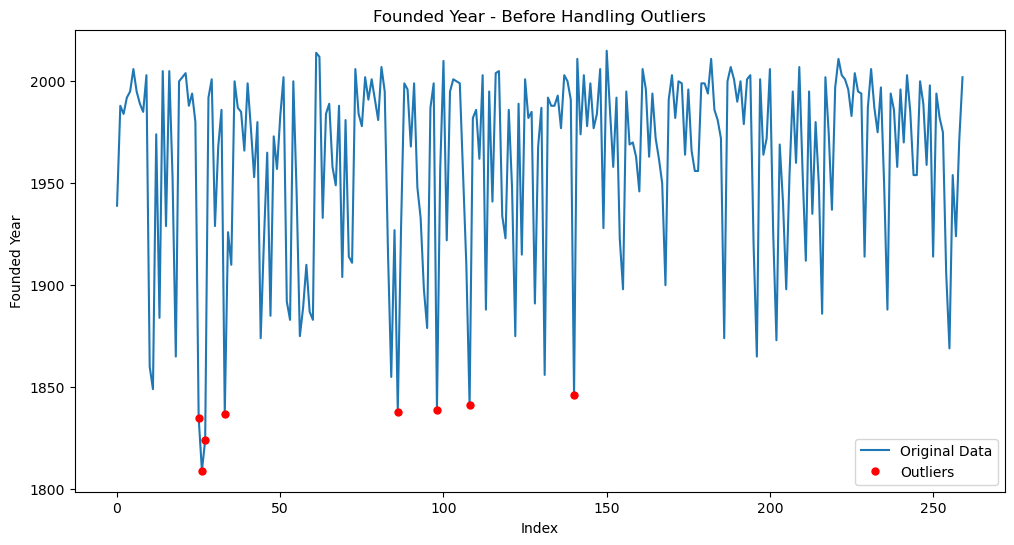

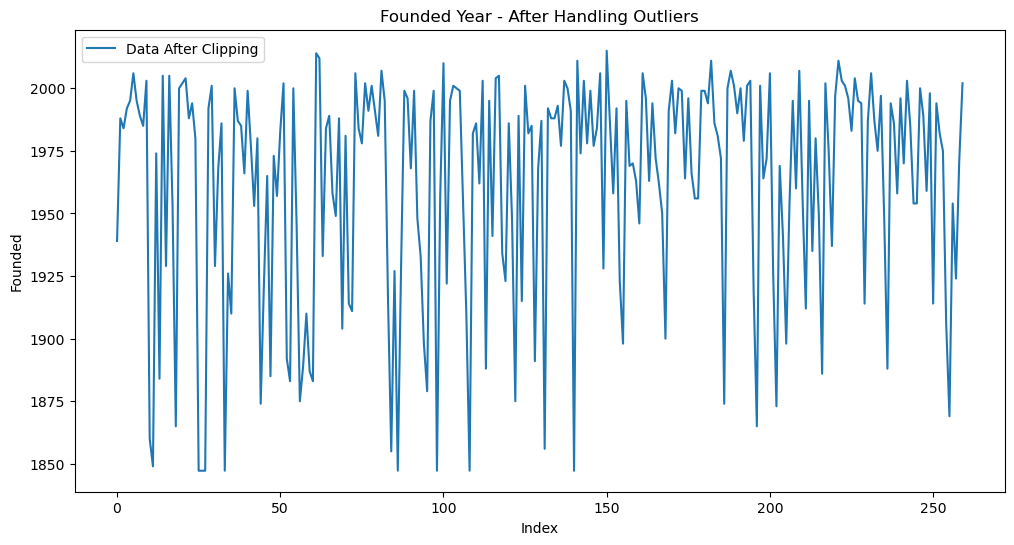

In [40]:
# Calculate Q1, Q3, and IQR for 'Founded_Year'
Q1 = df2['Founded'].quantile(0.25)
Q3 = df2['Founded'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identify anomalies (outliers)
df2['Anomaly_IQR'] = (df2['Founded'] < lower_bound) | (df2['Founded'] > upper_bound)

# Plot data before handling outliers
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['Founded'], label='Original Data')
plt.plot(
    df2[df2['Anomaly_IQR']].index,
    df2[df2['Anomaly_IQR']]['Founded'],
    'ro',
    markersize=5,
    label='Outliers'
)
plt.xlabel('Index')  # Set x-axis label
plt.ylabel('Founded Year')  # Set y-axis label
plt.title('Founded Year - Before Handling Outliers')  # Title
plt.legend()
plt.show()
# Handle outliers by clipping 
df2['Founded'] = df2['Founded'].clip(lower=lower_bound, upper=upper_bound)

# Plot data after handling outliers (optional)
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['Founded'], label='Data After Clipping')
plt.xlabel('Index')  # Set x-axis label
plt.ylabel('Founded')  # Set y-axis label
plt.title('Founded Year - After Handling Outliers')  # Title
plt.legend()
plt.show()


In [243]:
#Remove the extra column 'Anomaly_IQR' that was added earlier for visualizing outliers, after handling the outliers.
# Drop the 'Anomaly_IQR' column from the dataframe
df2 = df2.drop(columns=['Anomaly_IQR'])


In [245]:
df2.describe()

,Founded
count,260.000000
mean,1962.126923
std,44.907168
min,1847.250000
25%,1936.500000
50%,1981.000000
75%,1996.000000
max,2015.000000


In [179]:
#Method 5: Converting units
# Looking at the statistical summary of the Forecast column, 
# there is a wide range of values, Maximum: 724,602.5 vzs minimum: 66.0
#The range of values is vast, indicating that large countries with high GDP forecasts will dominate any analysis if the data is not standardized. 
#This imbalance can lead to biased results in statistical or machine learning models.
#Leading to reason for implementing standardizing forecast colum.

#from sklearn.preprocessing import StandardScaler

# Create a scaler object
#scaler = StandardScaler()

# Standardize the 'Founded' column
#df2['Founded_Standardized'] = scaler.fit_transform(df2[['Founded']])

# View the standardized column
#print(df2[['Founded', 'Founded_Standardized']])

In [247]:
#Change the column name 'Founded' to 'Founded_Year' to make it more meaningful.
df2.rename(columns={'Founded': 'Founded_Year'}, inplace=True)
# Display the updated DataFrame to confirm the change
print(df2.head())

            Name  Founded_Year
0      ABB Grain        1939.0
1   ABC Learning        1988.0
2      Ace Radio        1984.0
3  Adam Internet        1992.0
4  Aerosonde Ltd        1995.0


In [261]:
# If there are remaining floating point issues (e.g., 1990.0), convert them to integer explicitly
df2['Founded_Year'] = df2['Founded_Year'].apply(lambda x: int(x) if pd.notna(x) else pd.NA)

In [263]:
# Correction of typos:
print(df2['Founded_Year'].head())  # Display first few values
print(df2['Founded_Year'].dtype)  # Check the data type
# Fill NaN values with a placeholder (e.g., 0 or a default year)
df2['Founded_Year'] = df2['Founded_Year'].fillna(0)  # Use 0 or another valid year
# Convert the column to numeric (if it is still not in numeric format)
df2['Founded_Year'] = pd.to_numeric(df2['Founded_Year'], errors='coerce')
# If there are any floating point values with .0, we can convert the column to int
df2['Founded_Year'] = df2['Founded_Year'].astype('Int64')  # Nullable integers to handle NaN
print(df2.head())

0    1939
1    1988
2    1984
3    1992
4    1995
Name: Founded_Year, dtype: int64
int64
            Name  Founded_Year
0      ABB Grain          1939
1   ABC Learning          1988
2      Ace Radio          1984
3  Adam Internet          1992
4  Aerosonde Ltd          1995


In [265]:
df2

,Name,Founded_Year
0,ABB Grain,1939
1,ABC Learning,1988
2,Ace Radio,1984
3,Adam Internet,1992
4,Aerosonde Ltd,1995
...,...,...
255,Woods Bagot,1869
256,Woodside Petroleum,1954
257,Woolworths Limited,1924
258,WorleyParsons,1971


In [ ]:
#PART C

In [267]:
#Task 5: Store and cleaned dataset as csv file
df2.to_csv("C:\\Users\\Aynur\\Desktop\\GDDA612\\List_of_companies_of_Australia_cleaned.csv",index=False)

In [ ]:
#Task 6: Merge Data
